In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./useable_data.csv',index_col=0)

In [3]:
df_copy = df.copy()

In [4]:
def get_daytime(row):
    hour = int(row['hour'])
    if hour<8:
        return 'Morning'
    elif hour<16:
        return 'Noon'
    else:
        return 'Evening'

In [5]:
df.head()

CarID            StartTime  WaitingTime  Drop  Outflow  AvgProfit  \
1  粤B14A40  2011/04/19 11:20:55         67.0   0.0   1060.0  17.189364   
2  粤B14A40  2011/04/20 11:43:05         83.0   0.0   1387.0  15.103545   
3  粤B14A40  2011/04/21 10:48:36         73.0   0.0   1162.0  18.183764   
4  粤B14A40  2011/04/21 22:01:18         36.0   0.0   1110.0  18.183764   
5  粤B14A40  2011/04/22 12:48:48         58.0   0.0   1664.0  15.956711   

     AvgTime   AvgSpeed  AvgDistance  TotalTrips  AirportRatio  CabNum  Pick  \
1   8.978723  37.766542     0.036412        47.0      0.268056     530   1.0   
2   8.739130  29.645136     0.027069        46.0      0.268056     530   1.0   
3  12.606061  31.929873     0.041164        33.0      0.268056     463   1.0   
4  12.606061  31.929873     0.041164        33.0      0.268056     521   0.0   
5   8.591837  31.188595     0.030228        49.0      0.268056     534   1.0   

   hour  
1    11  
2    11  
3    10  
4    22  
5    12

In [6]:
df['DayTime'] = df.apply(get_daytime,axis=1)
df = df.drop(labels=['CarID','StartTime','hour','AvgSpeed'],axis=1)

In [7]:
df = pd.get_dummies(df)

In [8]:
df.head()

WaitingTime  Drop  Outflow  AvgProfit    AvgTime  AvgDistance  TotalTrips  \
1         67.0   0.0   1060.0  17.189364   8.978723     0.036412        47.0   
2         83.0   0.0   1387.0  15.103545   8.739130     0.027069        46.0   
3         73.0   0.0   1162.0  18.183764  12.606061     0.041164        33.0   
4         36.0   0.0   1110.0  18.183764  12.606061     0.041164        33.0   
5         58.0   0.0   1664.0  15.956711   8.591837     0.030228        49.0   

   AirportRatio  CabNum  Pick  DayTime_Evening  DayTime_Morning  DayTime_Noon  
1      0.268056     530   1.0                0                0             1  
2      0.268056     530   1.0                0                0             1  
3      0.268056     463   1.0                0                0             1  
4      0.268056     521   0.0                1                0             0  
5      0.268056     534   1.0                0                0             1

In [9]:
df.describe()

WaitingTime          Drop       Outflow     AvgProfit       AvgTime  \
count  10012.000000  10012.000000  10012.000000  10012.000000  10012.000000   
mean      28.186077      0.262085   1007.022573     19.967452     14.233261   
std       26.525039      0.439791    543.563261     13.367831     27.995397   
min        2.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.000000      0.000000    654.000000     15.987102      8.969460   
50%       17.000000      0.000000   1167.000000     18.560229     11.166667   
75%       43.000000      1.000000   1420.000000     21.664834     13.666667   
max      183.000000      1.000000   2215.000000    407.600000    655.500000   

        AvgDistance    TotalTrips  AirportRatio        CabNum          Pick  \
count  10012.000000  10012.000000  10012.000000  10012.000000  10012.000000   
mean       0.039611     38.113963      1.622537    494.323412      0.453156   
std        0.024411     14.503135    150.795425    198.113568      0.497826   
min        0.000000      0.000000      0.001389    117.000000      0.000000   
25%        0.027684     30.000000      0.027778    382.000000      0.000000   
50%        0.037897     40.000000      0.062500    460.000000      0.000000   
75%        0.048333     48.000000      0.129167    536.000000      1.000000   
max        0.828754     91.000000  15088.685417   1002.000000      1.000000   

       DayTime_Evening  DayTime_Morning  DayTime_Noon  
count     10012.000000     10012.000000  10012.000000  
mean          0.325410         0.332201      0.342389  
std           0.468551         0.471026      0.474533  
min           0.000000         0.000000      0.000000  
25%           0.000000         0.000000      0.000000  
50%           0.000000         0.000000      0.000000  
75%           1.000000         1.000000      1.000000  
max           1.000000         1.000000      1.000000

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10012 entries, 1 to 10208
Data columns (total 13 columns):
WaitingTime        10012 non-null float64
Drop               10012 non-null float64
Outflow            10012 non-null float64
AvgProfit          10012 non-null float64
AvgTime            10012 non-null float64
AvgDistance        10012 non-null float64
TotalTrips         10012 non-null float64
AirportRatio       10012 non-null float64
CabNum             10012 non-null int64
Pick               10012 non-null float64
DayTime_Evening    10012 non-null uint8
DayTime_Morning    10012 non-null uint8
DayTime_Noon       10012 non-null uint8
dtypes: float64(9), int64(1), uint8(3)
memory usage: 889.7 KB


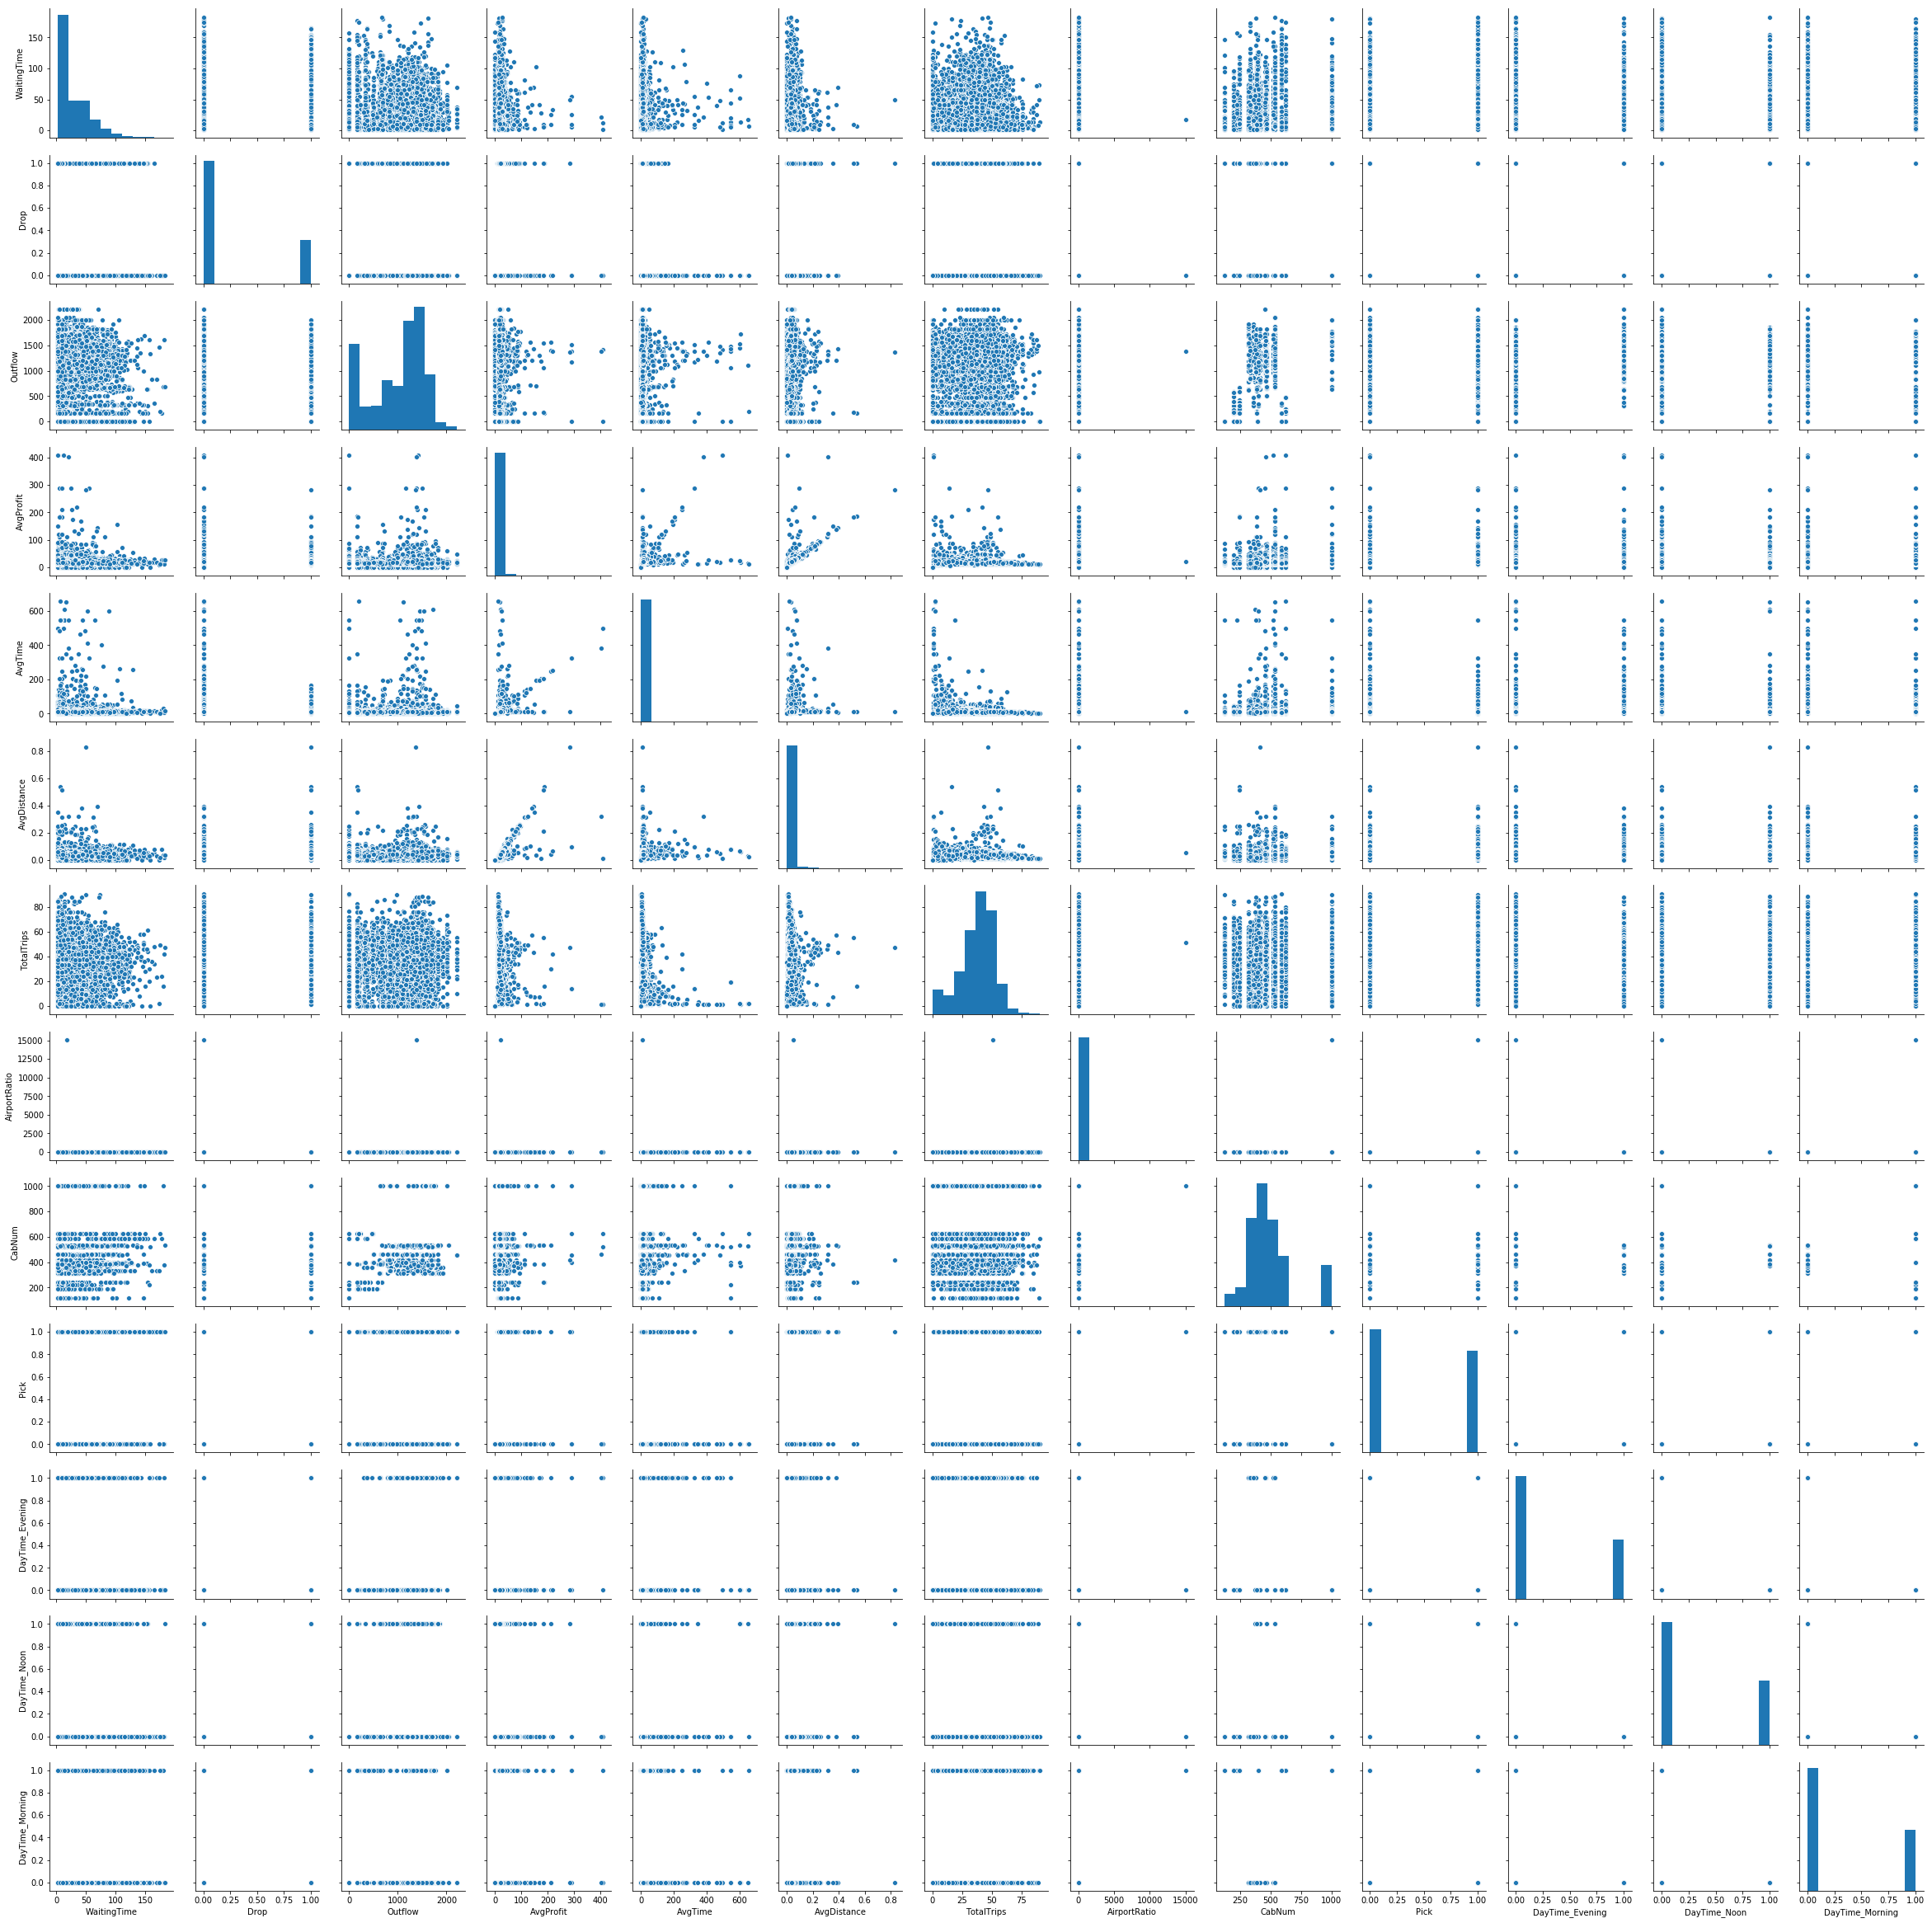

In [12]:
sns.pairplot(df[['WaitingTime','Drop','Outflow','AvgProfit','AvgTime','AvgDistance','TotalTrips','AirportRatio','CabNum','Pick','DayTime_Evening','DayTime_Noon','DayTime_Morning']])

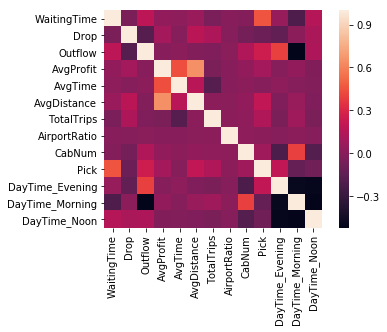

In [13]:
sns.heatmap(df.corr(),square=True)

In [14]:
df.corr()

WaitingTime      Drop   Outflow  AvgProfit   AvgTime  \
WaitingTime         1.000000 -0.043339  0.185049   0.033000  0.024092   
Drop               -0.043339  1.000000 -0.177041   0.093083 -0.009668   
Outflow             0.185049 -0.177041  1.000000  -0.003029  0.012516   
AvgProfit           0.033000  0.093083 -0.003029   1.000000  0.436591   
AvgTime             0.024092 -0.009668  0.012516   0.436591  1.000000   
AvgDistance         0.066599  0.176304 -0.016397   0.643767  0.172297   
TotalTrips         -0.047191  0.130109 -0.030904  -0.044735 -0.181386   
AirportRatio       -0.003606 -0.006071  0.006920   0.001823 -0.000937   
CabNum             -0.011894 -0.066624  0.143282   0.032811  0.011432   
Pick                0.455459 -0.101780  0.251487   0.093490 -0.008737   
DayTime_Evening     0.051252 -0.136639  0.391332  -0.009005  0.020917   
DayTime_Morning    -0.209661  0.008344 -0.520622   0.033033 -0.004240   
DayTime_Noon        0.157506  0.126635  0.130376  -0.023898 -0.016445   

                 AvgDistance  TotalTrips  AirportRatio    CabNum      Pick  \
WaitingTime         0.066599   -0.047191     -0.003606 -0.011894  0.455459   
Drop                0.176304    0.130109     -0.006071 -0.066624 -0.101780   
Outflow            -0.016397   -0.030904      0.006920  0.143282  0.251487   
AvgProfit           0.643767   -0.044735      0.001823  0.032811  0.093490   
AvgTime             0.172297   -0.181386     -0.000937  0.011432 -0.008737   
AvgDistance         1.000000    0.011396      0.004887  0.035046  0.199303   
TotalTrips          0.011396    1.000000      0.008726  0.030897  0.143746   
AirportRatio        0.004887    0.008726      1.000000  0.025570  0.011079   
CabNum              0.035046    0.030897      0.025570  1.000000  0.074308   
Pick                0.199303    0.143746      0.011079  0.074308  1.000000   
DayTime_Evening    -0.029027   -0.039825     -0.006862 -0.215598  0.199396   
DayTime_Morning     0.058876    0.079896      0.014103  0.399080 -0.118510   
DayTime_Noon       -0.029781   -0.039982     -0.007224 -0.183251 -0.079249   

                 DayTime_Evening  DayTime_Morning  DayTime_Noon  
WaitingTime             0.051252        -0.209661      0.157506  
Drop                   -0.136639         0.008344      0.126635  
Outflow                 0.391332        -0.520622      0.130376  
AvgProfit              -0.009005         0.033033     -0.023898  
AvgTime                 0.020917        -0.004240     -0.016445  
AvgDistance            -0.029027         0.058876     -0.029781  
TotalTrips             -0.039825         0.079896     -0.039982  
AirportRatio           -0.006862         0.014103     -0.007224  
CabNum                 -0.215598         0.399080     -0.183251  
Pick                    0.199396        -0.118510     -0.079249  
DayTime_Evening         1.000000        -0.489861     -0.501153  
DayTime_Morning        -0.489861         1.000000     -0.508925  
DayTime_Noon           -0.501153        -0.508925      1.000000

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


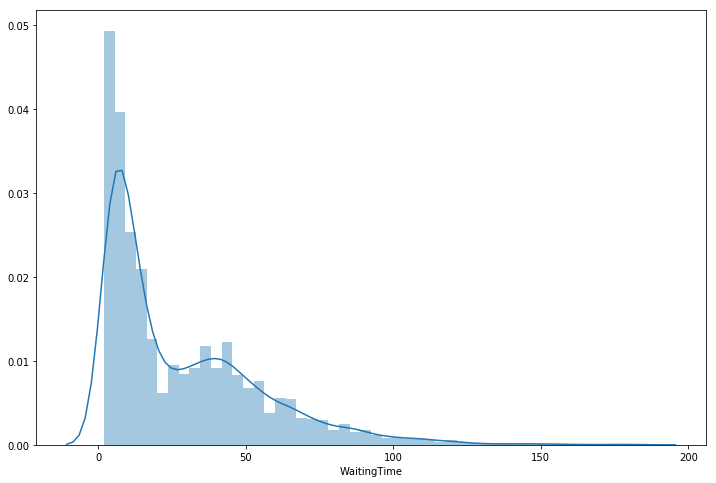

In [15]:
plt.figure(figsize=(12,8))
sns.distplot(df['WaitingTime'])

### Most waiting time is quite short

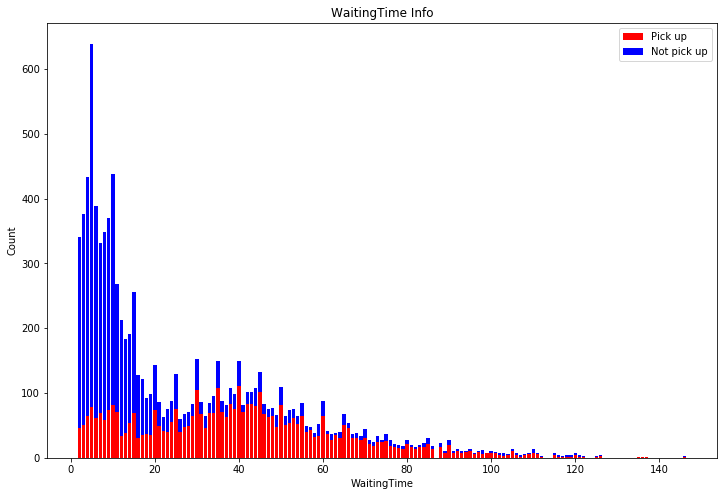

In [16]:
plt.figure(figsize=(12,8))

pick_df = df[df['Pick']==1]
pick = pick_df['WaitingTime'].value_counts()

leave_df = df[df['Pick']==0]
leave = leave_df['WaitingTime'].value_counts()

plt.bar(leave.index,pick[leave.index],color="red",label="Pick up")
plt.bar(leave.index,leave.values,bottom=pick[leave.index],color="blue",label="Not pick up")
plt.title("WaitingTime Info")
# plt.xlim=500
plt.xlabel("WaitingTime")
plt.ylabel("Count")
plt.legend(loc=1)

### Drivers who pick up passengers are likely to wait for a short time

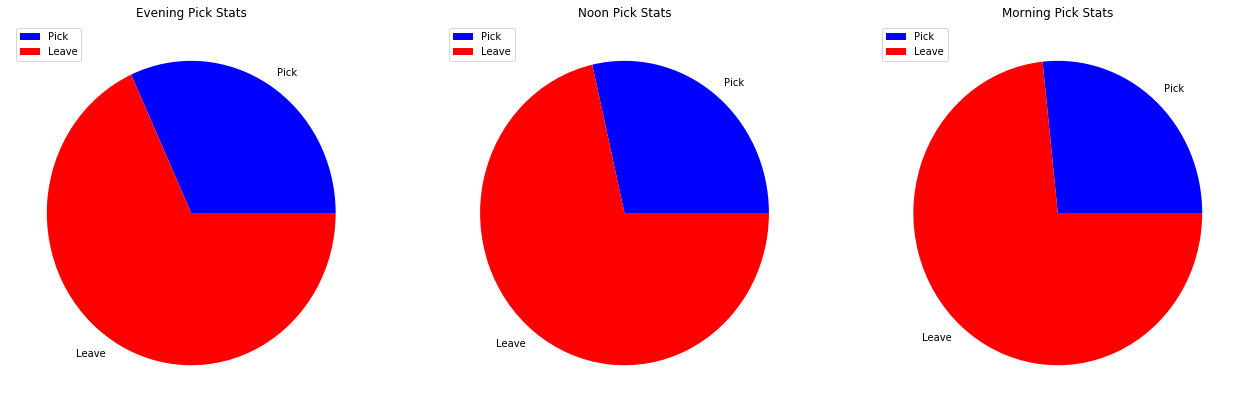

In [17]:
plt.figure(figsize=(22,7))

Evening_pick = df[ (df["Pick"]==1) & (df["DayTime_Evening"]==1)].shape[0]
Evening_leave = df[ (df["Pick"]==0) & (df["DayTime_Evening"]==0)].shape[0]
Noon_pick = df[ (df["Pick"]==1) & (df["DayTime_Noon"]==1)].shape[0]
Noon_leave = df[ (df["Pick"]==0) & (df["DayTime_Noon"]==0)].shape[0]
Morning_pick = df[ (df["Pick"]==1) & (df["DayTime_Morning"]==1)].shape[0]
Morning_leave = df[ (df["Pick"]==0) & (df["DayTime_Morning"]==0)].shape[0]

plt.subplot(1,3,1)
plt.pie([Evening_pick,Evening_leave],colors=('blue','red'),labels=("Pick","Leave"))
plt.title("Evening Pick Stats")
plt.legend(loc=0)

plt.subplot(1,3,2)
plt.pie([Noon_pick,Noon_leave],colors=('blue','red'),labels=("Pick","Leave"))
plt.title("Noon Pick Stats")
plt.legend(loc=0)

plt.subplot(1,3,3)
plt.pie([Morning_pick,Morning_leave],colors=('blue','red'),labels=("Pick","Leave"))
plt.title("Morning Pick Stats")
plt.legend(loc=0)

### Drivers tend to pick passengers more when it is late

In [18]:
df.to_csv('./ready_to_train.csv')